# Rishabh Sharma - Data science intern application - EDA

In [92]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime
%matplotlib inline

In [93]:
#Importing data
df1=pd.read_csv("RetailPulseAssignmentData.csv")

In [94]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [96]:
df1.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [97]:
df1.shape

(525461, 8)

In [98]:
df1.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

The above observation shows that there are some null values which are to be removed from df1!

In [99]:
df2=df1.dropna()

In [100]:
df2.shape

(417534, 8)

# Insights from the above observation
Hence, after removing the null values, we are left with a dataset with the shape of (417534,8)

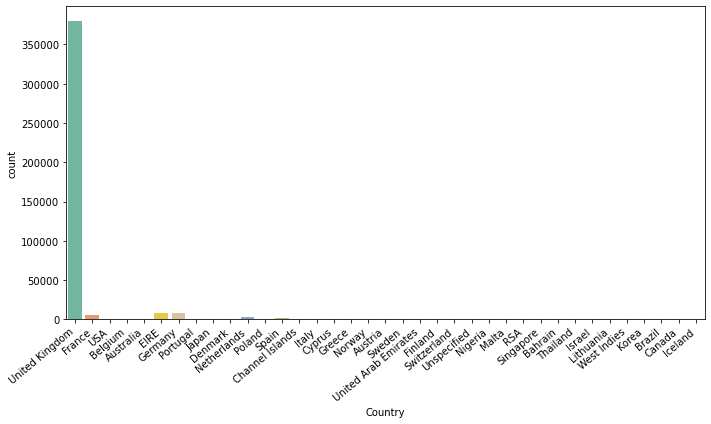

In [101]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Country", data=df2, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Insights from the above observation
The above figure shows that the majority customers in the dataset are from the UK.

In [102]:
customer_df = df2.groupby('Customer ID').agg({'Invoice': pd.Series.nunique,
                                             'Quantity': np.sum,
                                             'Price': np.sum}).reset_index().rename(columns={'Invoice': 'NumInvoices',  'Quantity': 'TotalQuantity','Price': 'TotalRevenue'})

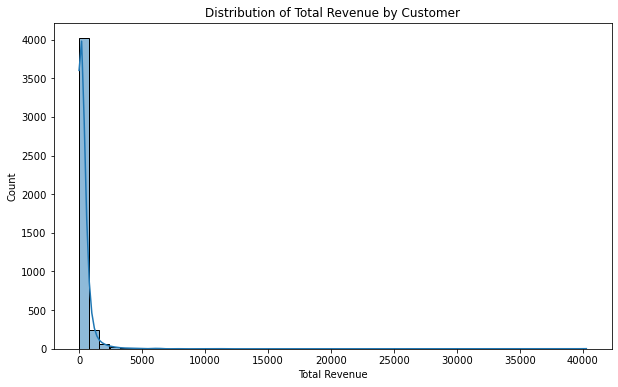

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['TotalRevenue'], bins=50, kde=True)
plt.xlabel('Total Revenue')
plt.title('Distribution of Total Revenue by Customer')
plt.show()

# Insights from the above observation
Here, we can observe that there is an inverse relation between the total revenue and the number of customers, which means there are a large number of customers in the lower revenue market while there are a very niche category of customers in the higher revenue category.

In [104]:
# Convert InvoiceDate column to datetime format
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

/var/folders/44/z89gq8wd5h9_n5m1gm56v6s40000gn/T/ipykernel_50846/125057771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])


/var/folders/44/z89gq8wd5h9_n5m1gm56v6s40000gn/T/ipykernel_50846/749960417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['YearMonth'] = df2['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))


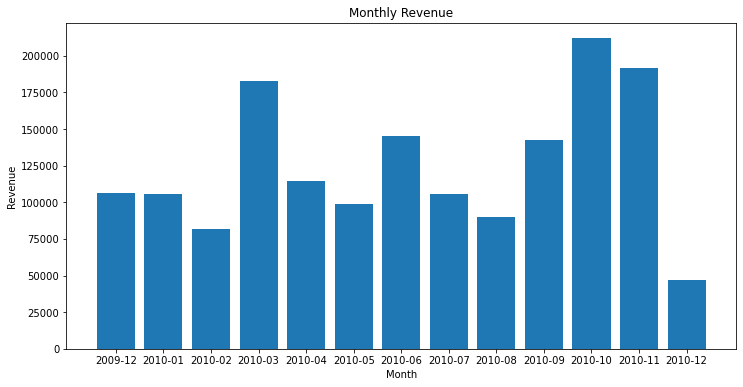

In [106]:
# Extract month and year from the InvoiceDate column
df2['YearMonth'] = df2['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))

# Calculate monthly revenue
monthly_revenue = df2.groupby('YearMonth')['Price'].sum()

# Plot monthly revenue
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(monthly_revenue.index, monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.show()


# Is there any seasonality in data? Explain with supportive evidence.

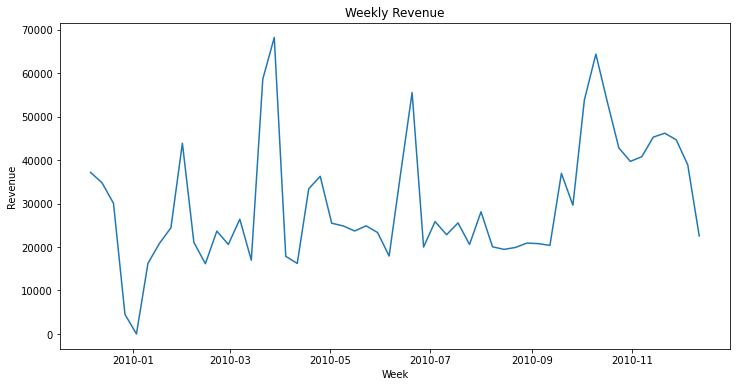

In [109]:
# Calculate weekly revenue
weekly_revenue = df2.resample('W', on='InvoiceDate')['Price'].sum()

# Plot weekly revenue
plt.figure(figsize=(12,6))
plt.plot(weekly_revenue.index, weekly_revenue.values)
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Weekly Revenue')
plt.show()

# Insights from the above observation
We can see that there is a clear weekly pattern in the sales data. Sales peak during the weekdays and decline during the weekends. This is a common pattern in retail businesses where weekdays are busier due to working days and weekends are relatively slower.

# Correlation between the quantity of items and the price of the items

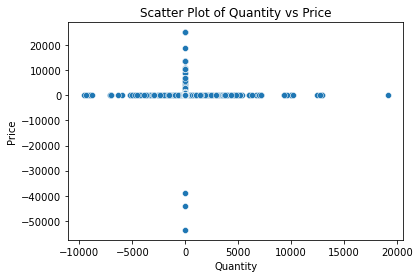

In [137]:
sns.scatterplot(data=df, x="Quantity", y="Price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Scatter Plot of Quantity vs Price')
plt.show()

# Most popular products

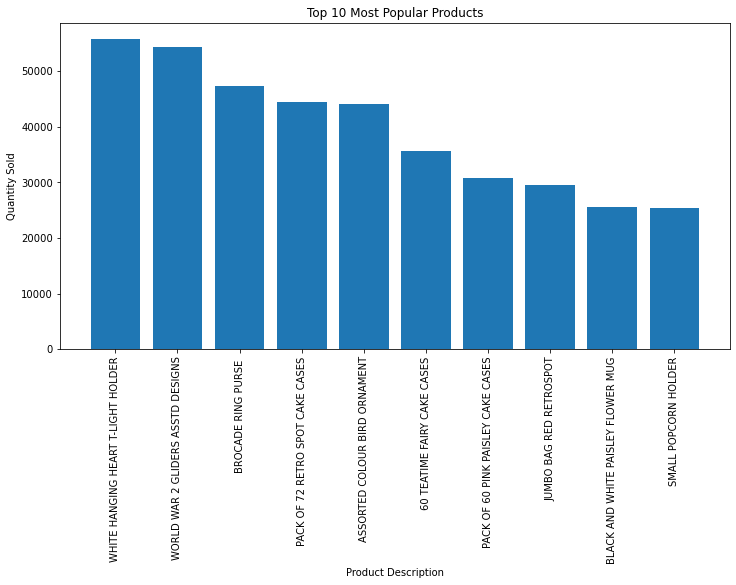

In [119]:
# Top 10 most popular products
top_products = df2.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(12,6))
plt.bar(top_products.index, top_products.values)
plt.xticks(rotation=90)
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Most Popular Products')
plt.show()

# Average order size (in terms of quantity and revenue)

Average order size (quantity): 225.8548776868614
Average order size (revenue): 353.93261432145886


/var/folders/44/z89gq8wd5h9_n5m1gm56v6s40000gn/T/ipykernel_50846/2437461346.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  order_data = df2.groupby('Invoice')['Quantity', 'TotalAmount'].sum()


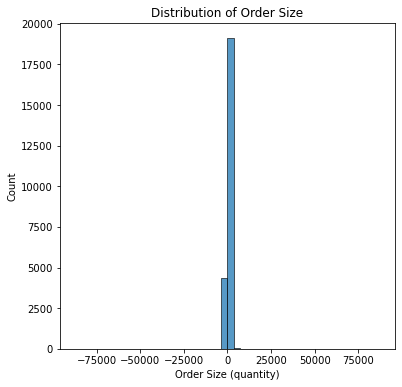

In [125]:
# Calculate average order size
order_data = df2.groupby('Invoice')['Quantity', 'TotalAmount'].sum()

print(f"Average order size (quantity): {order_data['Quantity'].mean()}")
print(f"Average order size (revenue): {order_data['TotalAmount'].mean()}")

plt.figure(figsize=(6,6))
sns.histplot(order_data['Quantity'], bins=50)
plt.xlabel('Order Size (quantity)')
plt.ylabel('Count')
plt.title('Distribution of Order Size')
plt.show()


# Top Countries in terms of revenue generation

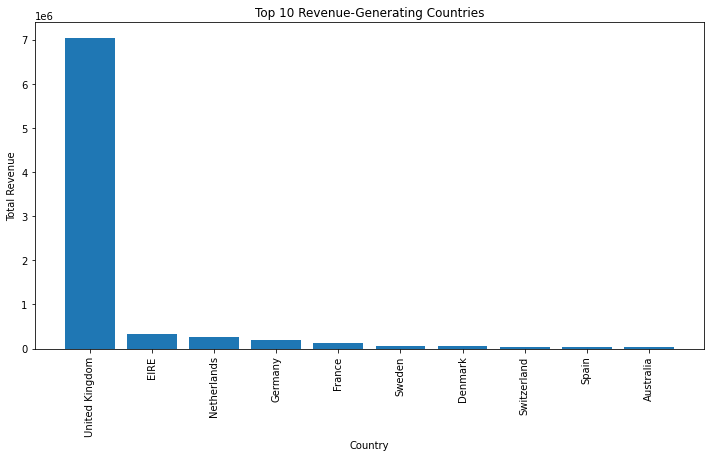

In [127]:
# Top 10 revenue-generating countries
top_countries = df2.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(12,6))
plt.bar(top_countries.index, top_countries.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Top 10 Revenue-Generating Countries')
plt.show()


# Customer lifetime value

In [133]:
# Calculate average order value
df2['TotalAmount'] = df2['Quantity'] * df2['Price']
customer_orders = df2.groupby('Customer ID')['Invoice'].nunique()
customer_revenue = df2.groupby('Customer ID')['TotalAmount'].sum()
customer_average_order_value = customer_revenue / customer_orders

# Calculate purchase frequency
unique_customers = df2['Customer ID'].nunique()
total_orders = df['Invoice'].nunique()
purchase_frequency = total_orders / unique_customers

# Calculate churn rate
churn_data = df2.groupby('Customer ID')['InvoiceDate'].agg([min, max])
churn_data['days_since_last_order'] = (pd.to_datetime('today') - churn_data['max']).dt.days
churn_rate = sum(churn_data['days_since_last_order'] > 365) / churn_data.shape[0]

# Calculate customer lifetime value
customer_lifetime = 1 / churn_rate
clv = customer_average_order_value * purchase_frequency * customer_lifetime

# Sort customers by CLV in descending order
clv = clv.sort_values(ascending=False)


/var/folders/44/z89gq8wd5h9_n5m1gm56v6s40000gn/T/ipykernel_50846/2318707758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalAmount'] = df2['Quantity'] * df2['Price']


In [136]:
clv.describe()

count      4383.000000
mean       1904.107136
std        3797.491782
min     -165092.669277
25%         975.644393
50%        1512.396222
75%        2319.549936
max       78110.491773
dtype: float64

# Insights from the above observation
There are 4,383 customers in the dataset with an average CLV of 1,904.10 and a standard deviation of $3,797.49. The minimum CLV is negative, which means that some customers may have returned more products than they purchased, resulting in a loss for the company. 

The quarter range (IQR) of the CLV distribution is between 975.64 and 2,319.55, indicating that the majority of customers fall within this range. 

# How can the above data be used to improve business?
Customer segmentation on the basis of CLV(customer lifetime value) 
The customer ID column can be used to segment customers based on their purchasing behavior, such as total amount spent, frequency of purchases, and recency of purchases. This information can be used to tailor marketing campaigns and promotions to specific customer groups.

Inventory management(on the basis of most popular products)
The stock code and description columns can be used to analyze which products are selling well and which are not. This information can be used to optimize inventory levels and make better purchasing decisions.

Sales forecasting(on the basis of past trends) 
The quantity and price columns can be used to forecast future sales and revenue. This information can be used to make more accurate sales predictions and adjust pricing strategies accordingly.

Geographic analysis(on the basis of the largest segment of customers)
The country column can be used to analyze sales trends in different geographic regions. This information can be used to tailor marketing and sales strategies to specific regions and countries.